In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
parquet_file_path = '/content/drive/MyDrive/Personal Projects/Amex Competition/Data/train_data.parquet'
train = pd.read_parquet(parquet_file_path)

parquet_file_path2 = '/content/drive/MyDrive/Personal Projects/Amex Competition/Data/test_data.parquet'
test = pd.read_parquet(parquet_file_path2)

train_lables = pd.read_csv('/content/drive/MyDrive/Personal Projects/Amex Competition/Data/train_labels.csv')

In [ ]:
train.shape

(5531451, 191)

In [ ]:
test.shape

(11363762, 190)

In [ ]:
train_lables.shape

(458913, 2)

#1. DATA QUALITY

In [ ]:
train_data_quality  = pd.DataFrame({'Missing values':train.isnull().sum(),'Percentage of missing': (train.isnull().sum()/len(train))*100})
train_data_quality.sort_values('Percentage of missing',ascending=False)

Missing values  Percentage of missing
D_87           5527586              99.930127
D_88           5525447              99.891457
D_108          5502513              99.476846
D_111          5500117              99.433530
D_110          5500117              99.433530
...                ...                    ...
D_75                 0               0.000000
P_4                  0               0.000000
B_23                 0               0.000000
S_15                 0               0.000000
target               0               0.000000

[191 rows x 2 columns]

In [ ]:
test_data_quality  = pd.DataFrame({'Missing values':test.isnull().sum(),'Percentage of missing': (test.isnull().sum()/len(test))*100})
test_data_quality.sort_values('Percentage of missing',ascending=False)

Missing values  Percentage of missing
D_87               11352790              99.903447
D_88               11352497              99.900869
D_108              11295987              99.403587
D_110              11247468              98.976624
D_111              11247468              98.976624
...                     ...                    ...
D_94                      0               0.000000
D_93                      0               0.000000
D_92                      0               0.000000
R_23                      0               0.000000
customer_ID               0               0.000000

[190 rows x 2 columns]

In [ ]:
train.nunique()
#This means customers account details are repeating
# Could be their last 18 months statements.

customer_ID    458913
S_2               396
P_2             17205
D_39            11242
B_1             22627
                ...  
D_142           14075
D_143            8491
D_144           15412
D_145            9228
target              2
Length: 191, dtype: int64

In [ ]:
test.nunique()

customer_ID    924621
S_2               579
P_2             19807
D_39            11333
B_1             25160
                ...  
D_141            9088
D_142           16719
D_143            8491
D_144           15566
D_145            9234
Length: 190, dtype: int64

In [ ]:
# Count the number of statements per customer
statement_counts = train.customer_ID.value_counts()

# Count how many customers have each number of statements
customer_distribution = statement_counts.value_counts()

# Create a DataFrame from the distribution and reset the index
customer_distribution = customer_distribution.rename('Nbr of customers')
statements_df = customer_distribution.reset_index()

# Rename the columns for clarity
statements_df.columns = ["Nbr of Statements per customer", "Nbr of customers"]

# Sort the DataFrame by the number of statements in descending order
statements_df = statements_df.sort_values(by="Nbr of Statements per customer", ascending=False)

In [ ]:
statements_df # 80% of customers have 13 statements, and rest have 12 to 1 statememnts

Nbr of Statements per customer  Nbr of customers
0                               13            386034
1                               12             10623
6                               11              5961
2                               10              6721
3                                9              6411
4                                8              6110
9                                7              5198
8                                6              5515
12                               5              4671
11                               4              4673
7                                3              5778
5                                2              6098
10                               1              5120

In [ ]:
train.columns.tolist()

['customer_ID',
 'S_2',
 'P_2',
 'D_39',
 'B_1',
 'B_2',
 'R_1',
 'S_3',
 'D_41',
 'B_3',
 'D_42',
 'D_43',
 'D_44',
 'B_4',
 'D_45',
 'B_5',
 'R_2',
 'D_46',
 'D_47',
 'D_48',
 'D_49',
 'B_6',
 'B_7',
 'B_8',
 'D_50',
 'D_51',
 'B_9',
 'R_3',
 'D_52',
 'P_3',
 'B_10',
 'D_53',
 'S_5',
 'B_11',
 'S_6',
 'D_54',
 'R_4',
 'S_7',
 'B_12',
 'S_8',
 'D_55',
 'D_56',
 'B_13',
 'R_5',
 'D_58',
 'S_9',
 'B_14',
 'D_59',
 'D_60',
 'D_61',
 'B_15',
 'S_11',
 'D_62',
 'D_63',
 'D_64',
 'D_65',
 'B_16',
 'B_17',
 'B_18',
 'B_19',
 'D_66',
 'B_20',
 'D_68',
 'S_12',
 'R_6',
 'S_13',
 'B_21',
 'D_69',
 'B_22',
 'D_70',
 'D_71',
 'D_72',
 'S_15',
 'B_23',
 'D_73',
 'P_4',
 'D_74',
 'D_75',
 'D_76',
 'B_24',
 'R_7',
 'D_77',
 'B_25',
 'B_26',
 'D_78',
 'D_79',
 'R_8',
 'R_9',
 'S_16',
 'D_80',
 'R_10',
 'R_11',
 'B_27',
 'D_81',
 'D_82',
 'S_17',
 'R_12',
 'B_28',
 'R_13',
 'D_83',
 'R_14',
 'R_15',
 'D_84',
 'R_16',
 'B_29',
 'B_30',
 'S_18',
 'D_86',
 'D_87',
 'R_17',
 'R_18',
 'D_88',
 'B_31',
 'S_

In [ ]:
df_filter1 = train[train['customer_ID'] == '0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a']

In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df_filter1)

https://docs.google.com/spreadsheets/d/1N-xiEutD56eYsfeg5DTPY-dmfWtc-JeyyzqSO5GI04E#gid=0


# 2. EDA


WHEN DID CUSTOMERS RECIVE RECENT CREDIT CARD STATEMENTS

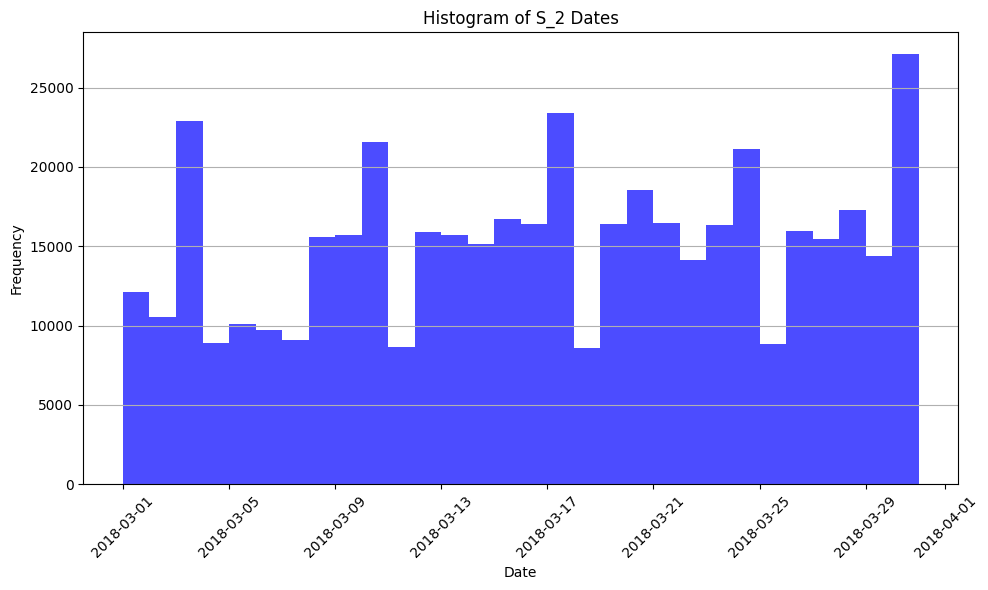

In [ ]:
train_last_occurrences = train

train_last_occurrences['S_2'] = pd.to_datetime(train_last_occurrences['S_2'])
plt.figure(figsize=(10, 6))
plt.hist(train_last_occurrences['S_2'], bins=30, color='blue', alpha=0.7)
plt.title('Histogram of S_2 Dates')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

FEATURES DISTIBUTION





In [ ]:
delinquency_features = [c for c in train.columns if c.startswith('D_')]
spend_features = [c for c in train.columns if c.startswith('S_')]
payment_features = [c for c in train.columns if c.startswith('P_')]
balance_features = [c for c in train.columns if c.startswith('B_')]
risk_features = [c for c in train.columns if c.startswith('R_')]

print(f"Total number of Delinquency variables: {len(delinquency_features)}")
print(f"Total number of Spend variables: {len(spend_features)}")
print(f"Total number of Payment variables: {len(payment_features)}")
print(f"Total number of Balance variables: {len(balance_features)}")
print(f"Total number of Risk variables: {len(risk_features)}")

Total number of Delinquency variables: 96
Total number of Spend variables: 22
Total number of Payment variables: 3
Total number of Balance variables: 40
Total number of Risk variables: 28


In [ ]:
train = train.groupby('customer_ID').tail(1).set_index('customer_ID')
train

S_2       P_2  \
customer_ID                                                               
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb... 2018-03-13  0.934570   
00000fd6641609c6ece5454664794f0340ad84dddce9a26... 2018-03-25  0.880371   
00001b22f846c82c51f6e3958ccd81970162bae8b007e80... 2018-03-12  0.880859   
000041bdba6ecadd89a52d11886e8eaaec9325906c97233... 2018-03-29  0.621582   
00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8ad... 2018-03-30  0.872070   
...                                                       ...       ...   
ffff41c8a52833b56430603969b9ca48d208e7c192c6a40... 2018-03-31  0.844238   
ffff518bb2075e4816ee3fe9f3b152c57fc0e6f01bf7fdd... 2018-03-22  0.831055   
ffff9984b999fccb2b6127635ed0736dda94e544e67e026... 2018-03-07  0.800293   
ffffa5c46bc8de74f5a4554e74e239c8dee6b9baf388145... 2018-03-23  0.753906   
fffff1d38b785cef84adeace64f8f83db3a0c31e8d92eab... 2018-03-14  0.981934   

                                                        D_39       B_1  \
customer_ID                                                              
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb...  0.009117  0.009384   
00000fd6641609c6ece5454664794f0340ad84dddce9a26...  0.178101  0.034698   
00001b22f846c82c51f6e3958ccd81970162bae8b007e80...  0.009705  0.004284   
000041bdba6ecadd89a52d11886e8eaaec9325906c97233...  0.001082  0.012566   
00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8ad...  0.005573  0.007679   
...                                                      ...       ...   
ffff41c8a52833b56430603969b9ca48d208e7c192c6a40...  0.447510  0.028519   
ffff518bb2075e4816ee3fe9f3b152c57fc0e6f01bf7fdd...  0.033661  0.292480   
ffff9984b999fccb2b6127635ed0736dda94e544e67e026...  0.267090  0.020569   
ffffa5c46bc8de74f5a4554e74e239c8dee6b9baf388145...  0.008621  0.015839   
fffff1d38b785cef84adeace64f8f83db3a0c31e8d92eab...  0.002474  0.000077   

                                                         B_2       R_1  \
customer_ID                                                              
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb...  1.007812  0.006104   
00000fd6641609c6ece5454664794f0340ad84dddce9a26...  1.003906  0.006912   
00001b22f846c82c51f6e3958ccd81970162bae8b007e80...  0.812500  0.006451   
000041bdba6ecadd89a52d11886e8eaaec9325906c97233...  1.005859  0.007828   
00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8ad...  0.815918  0.001247   
...                                                      ...       ...   
ffff41c8a52833b56430603969b9ca48d208e7c192c6a40...  1.009766  0.001928   
ffff518bb2075e4816ee3fe9f3b152c57fc0e6f01bf7fdd...  0.055664  0.006954   
ffff9984b999fccb2b6127635ed0736dda94e544e67e026...  1.006836  0.000957   
ffffa5c46bc8de74f5a4554e74e239c8dee6b9baf388145...  0.714355  0.000993   
fffff1d38b785cef84adeace64f8f83db3a0c31e8d92eab...  0.992676  0.000809   

                                                         S_3      D_41  \
customer_ID                                                              
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb...  0.135010  0.001604   
00000fd6641609c6ece5454664794f0340ad84dddce9a26...  0.165527  0.005550   
00001b22f846c82c51f6e3958ccd81970162bae8b007e80...       NaN  0.003796   
000041bdba6ecadd89a52d11886e8eaaec9325906c97233...  0.287842  0.004532   
00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8ad...       NaN  0.000231   
...                                                      ...       ...   
ffff41c8a52833b56430603969b9ca48d208e7c192c6a40...  0.128662  0.003483   
ffff518bb2075e4816ee3fe9f3b152c57fc0e6f01bf7fdd...       NaN  0.005791   
ffff9984b999fccb2b6127635ed0736dda94e544e67e026...  0.066650  0.007423   
ffffa5c46bc8de74f5a4554e74e239c8dee6b9baf388145...  0.408936  0.003391   
fffff1d38b785cef84adeace64f8f83db3a0c31e8d92eab...  0.119141  0.003286   

                                                         B_3  D_42  ...  \
customer_ID                                                         ...   
0000099d6bd597052cdcda90ffabf56573fe9d7c79b

# Insights

1. Imbalanced classes, when doing CV need to implement Stratified K-Fold CV
2. This makes sure each fold has same proportion of classes (74:25).

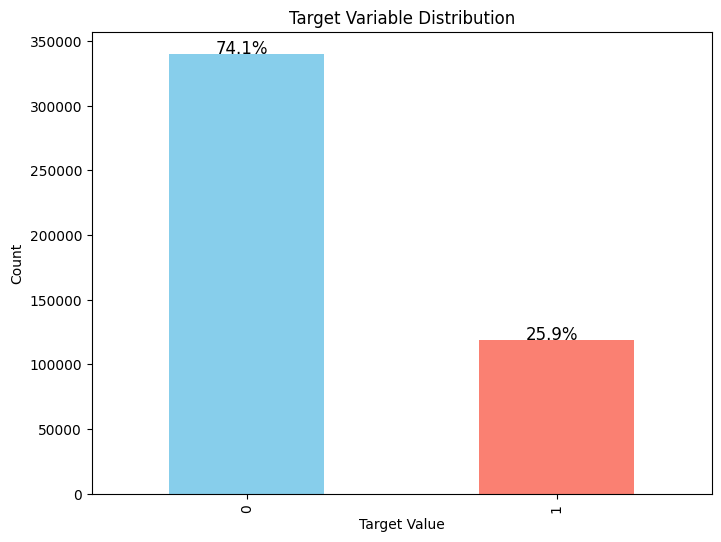

In [ ]:
target_counts = train['target'].value_counts()
plt.figure(figsize=(8, 6))
ax = target_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Target Variable Distribution')
plt.xlabel('Target Value')
plt.ylabel('Count')

total = len(train)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_y() + p.get_height() + 100
    ax.annotate(percentage, (x, y), fontsize=12)

plt.show()

# 0 => No default
# 1 => Default

Categorical Features

['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68']


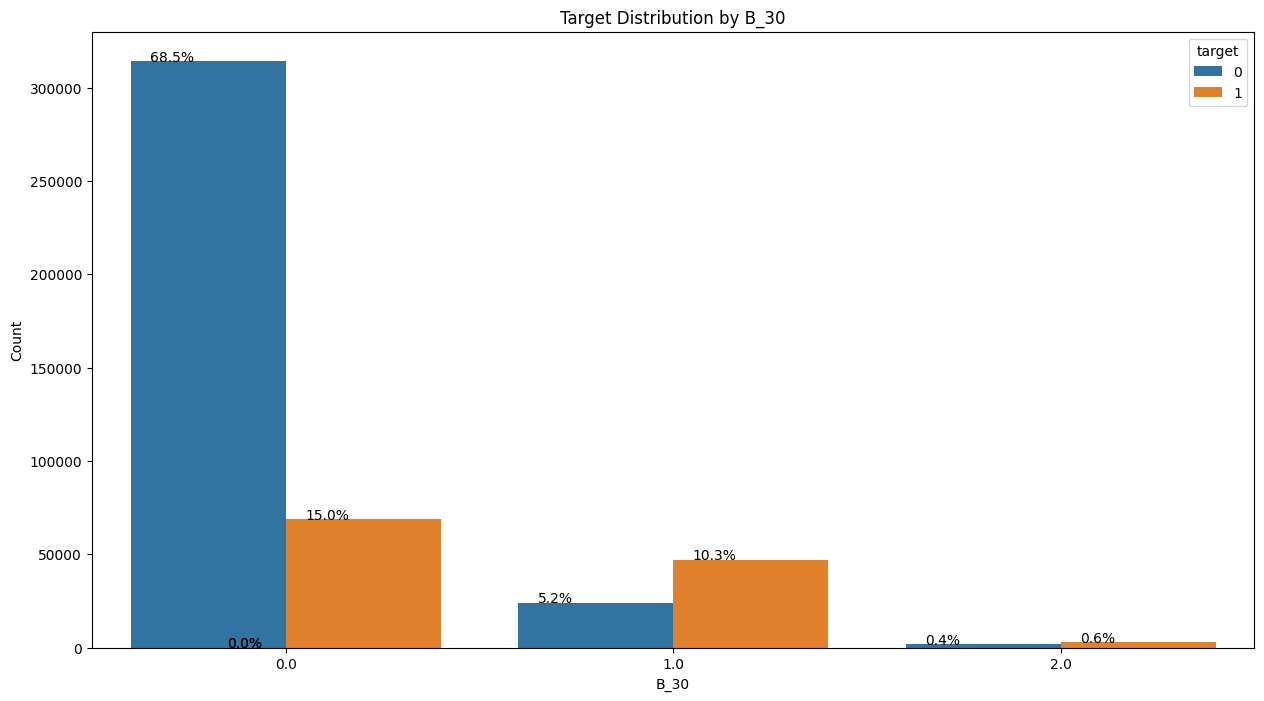

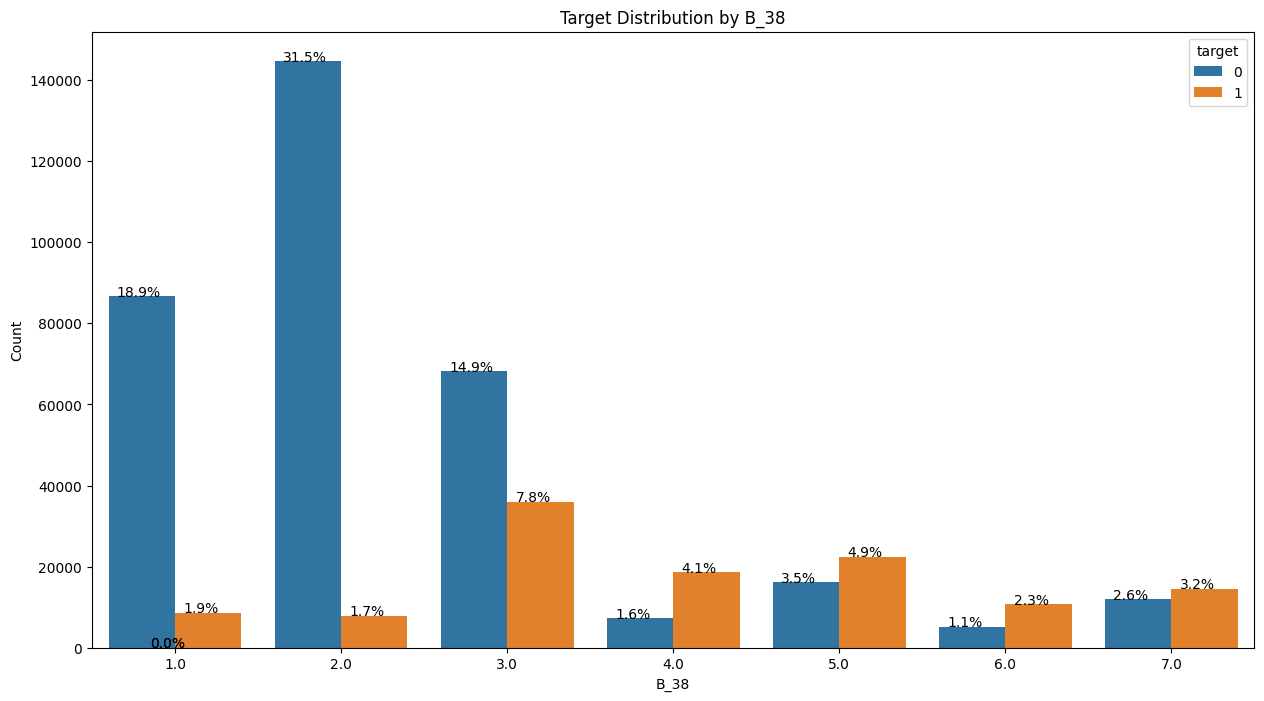

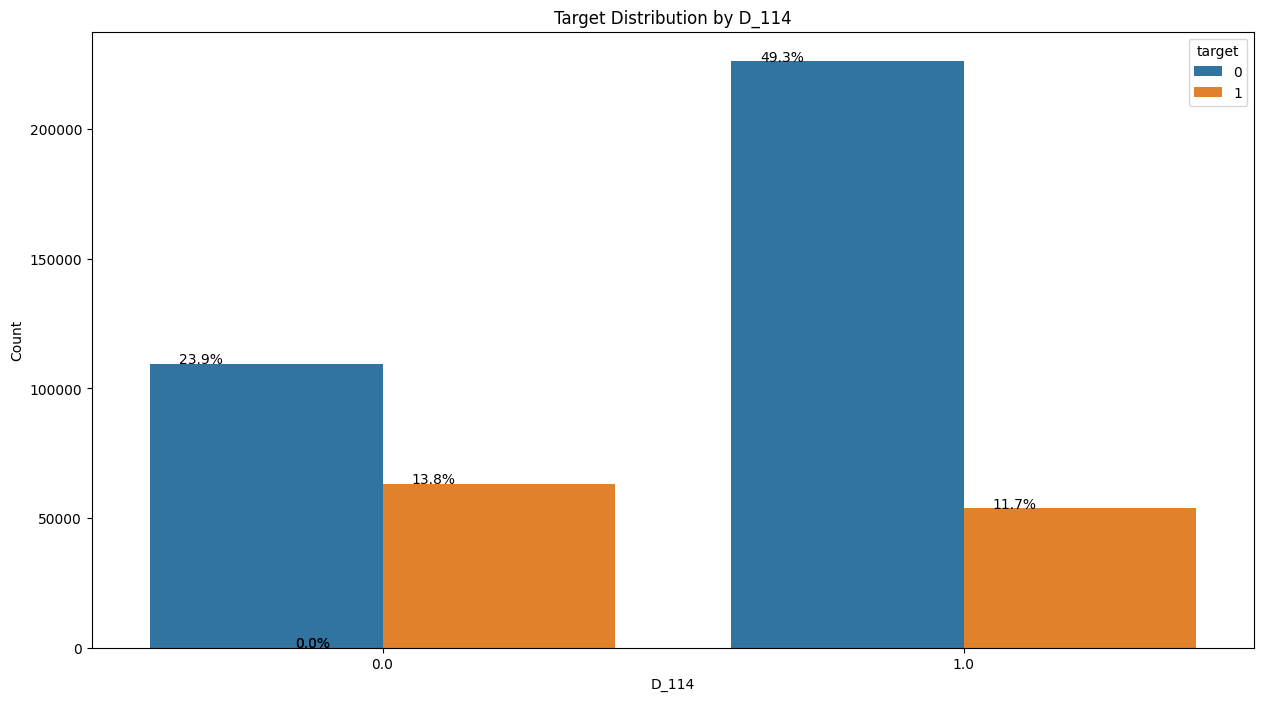

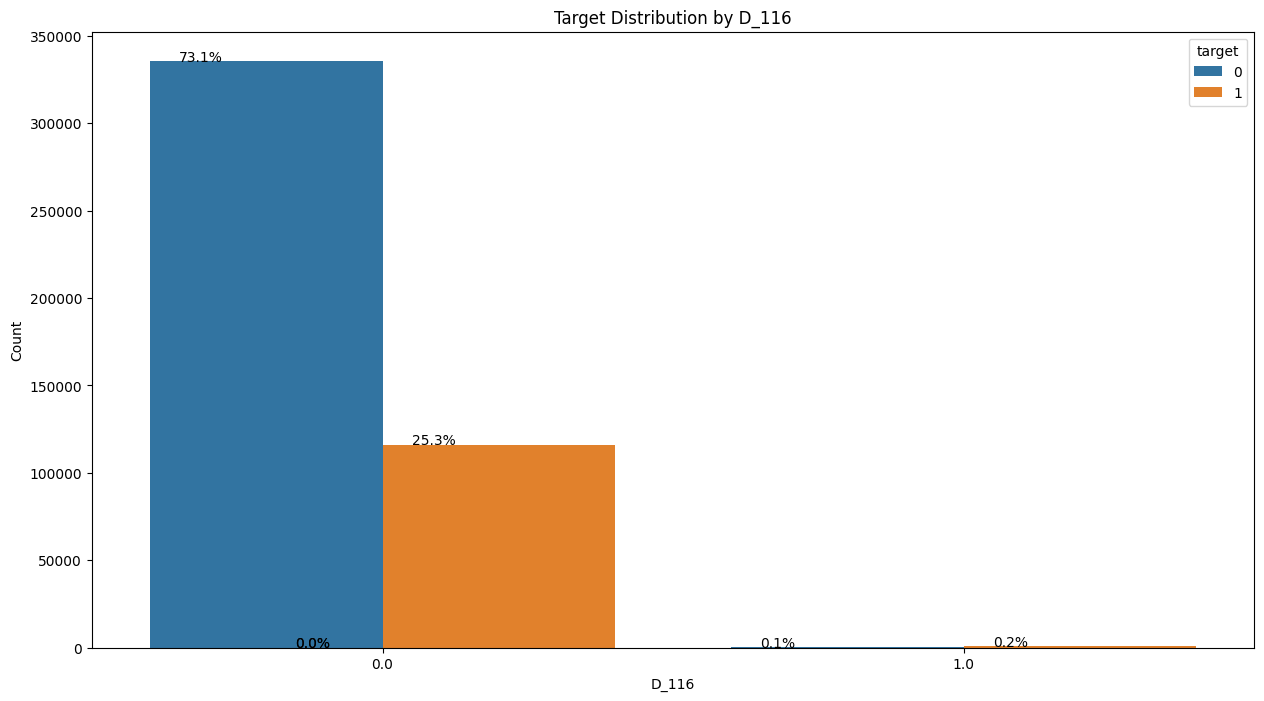

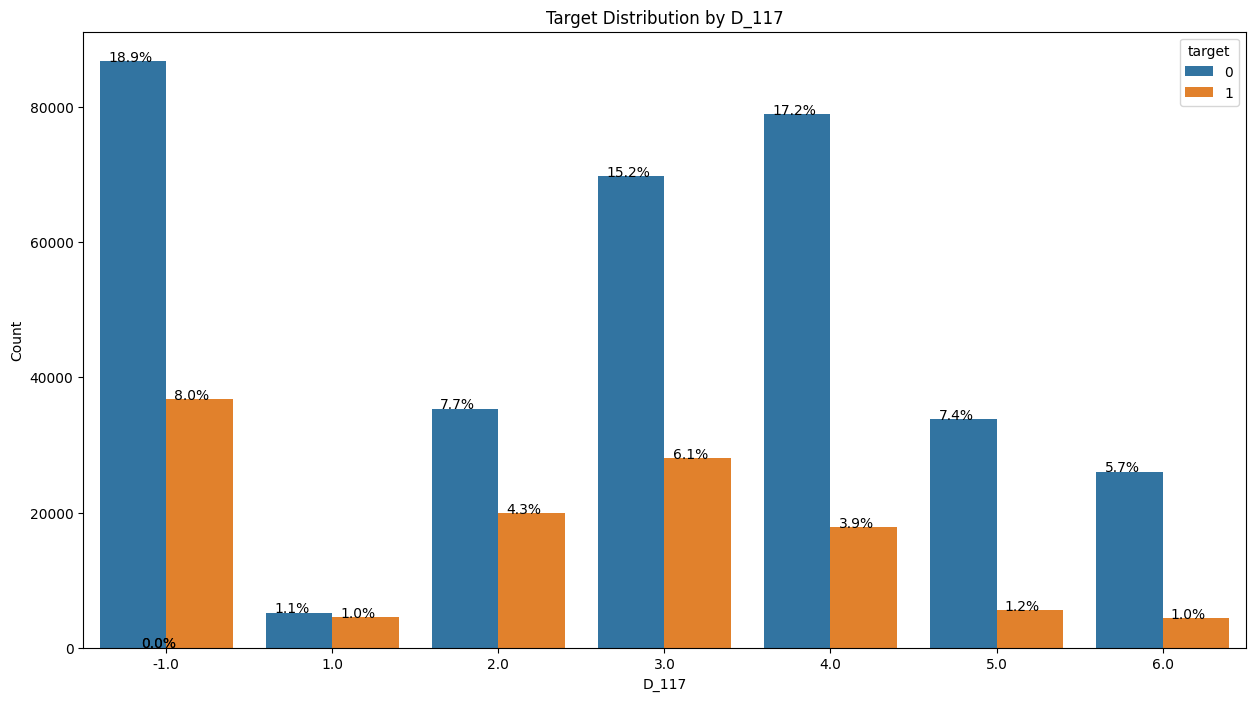

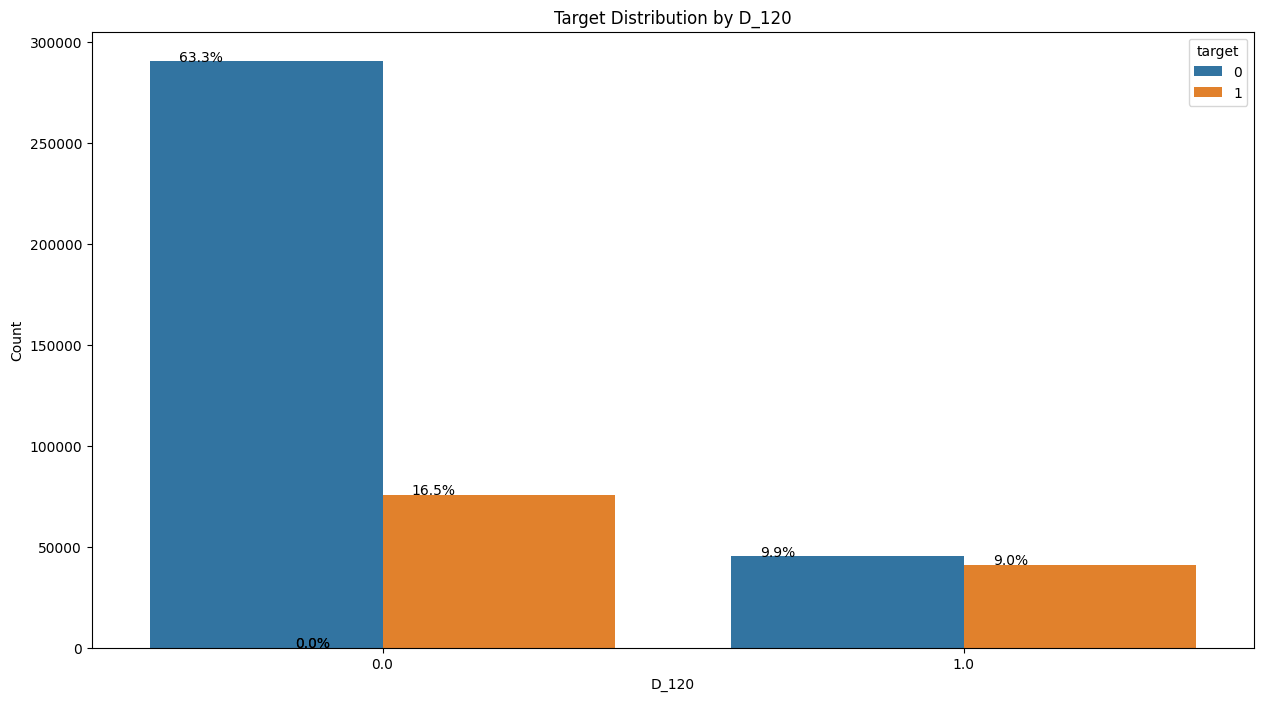

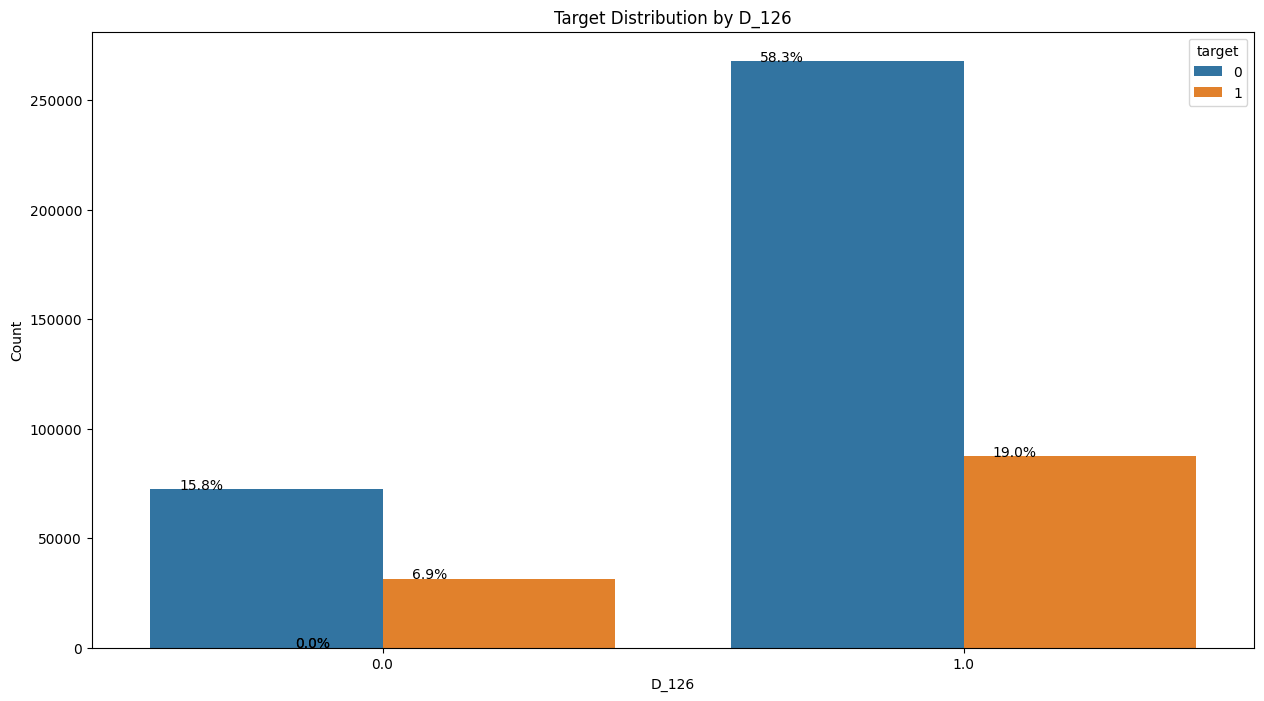

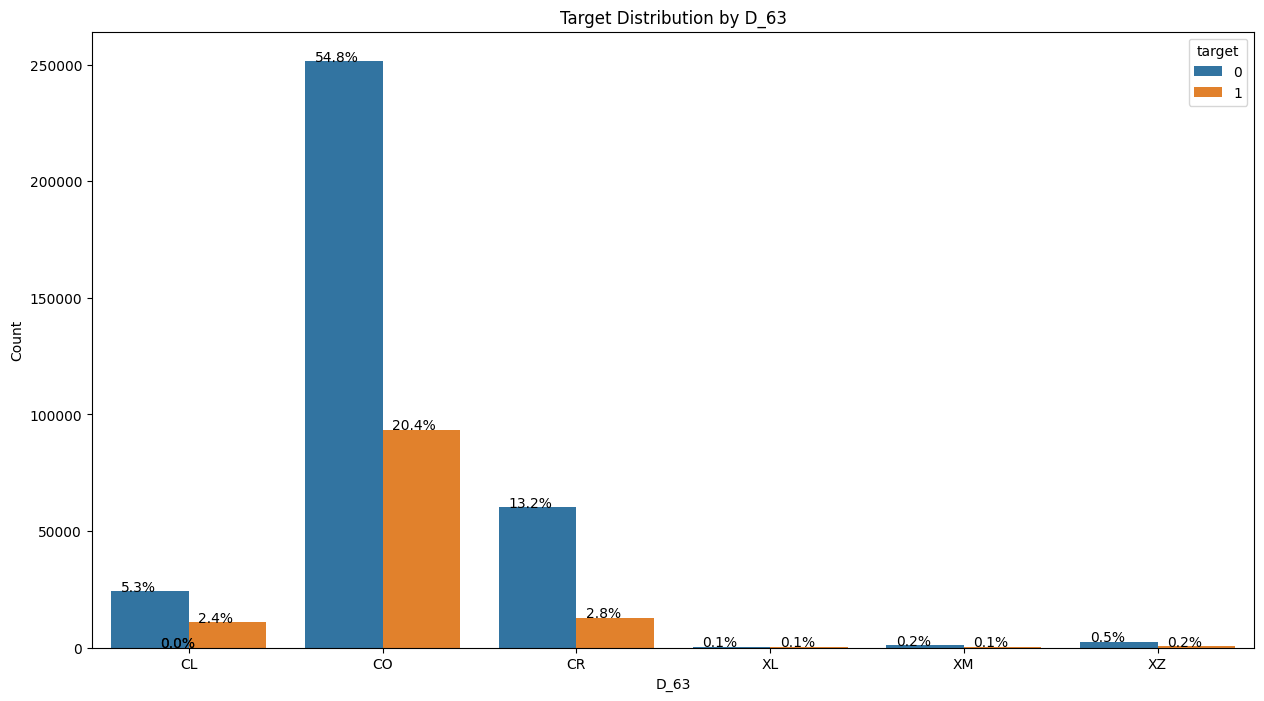

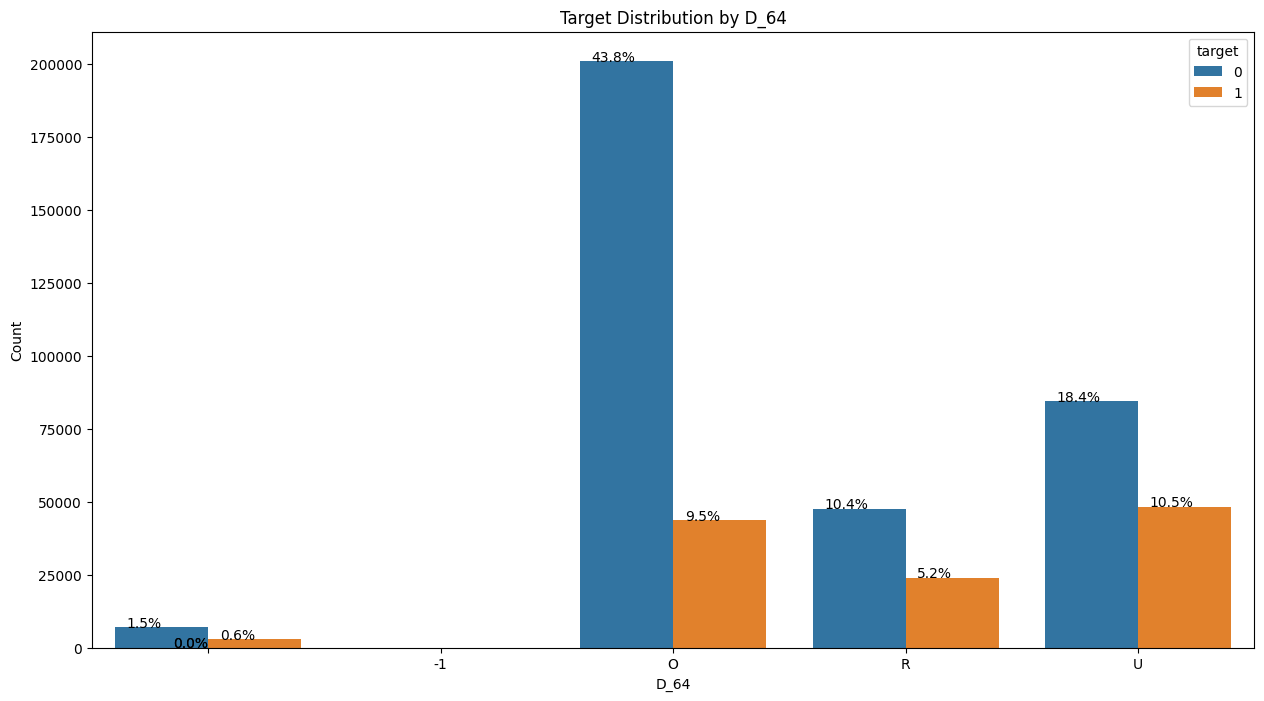

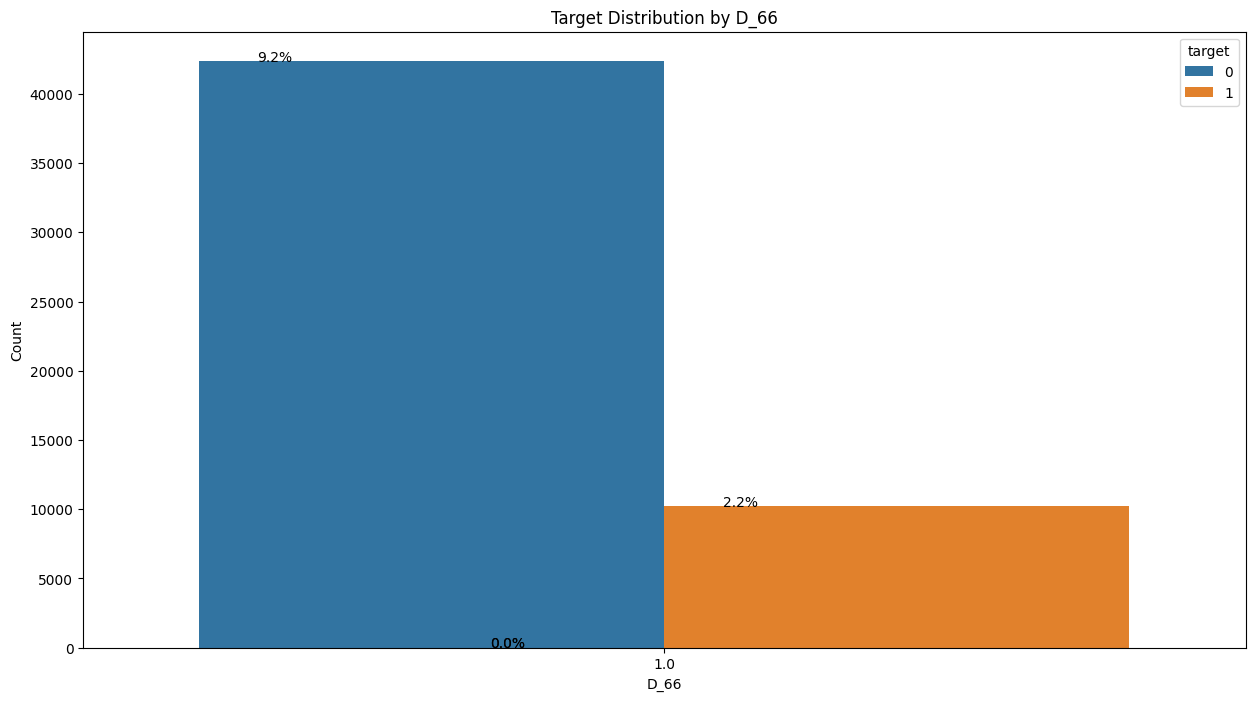

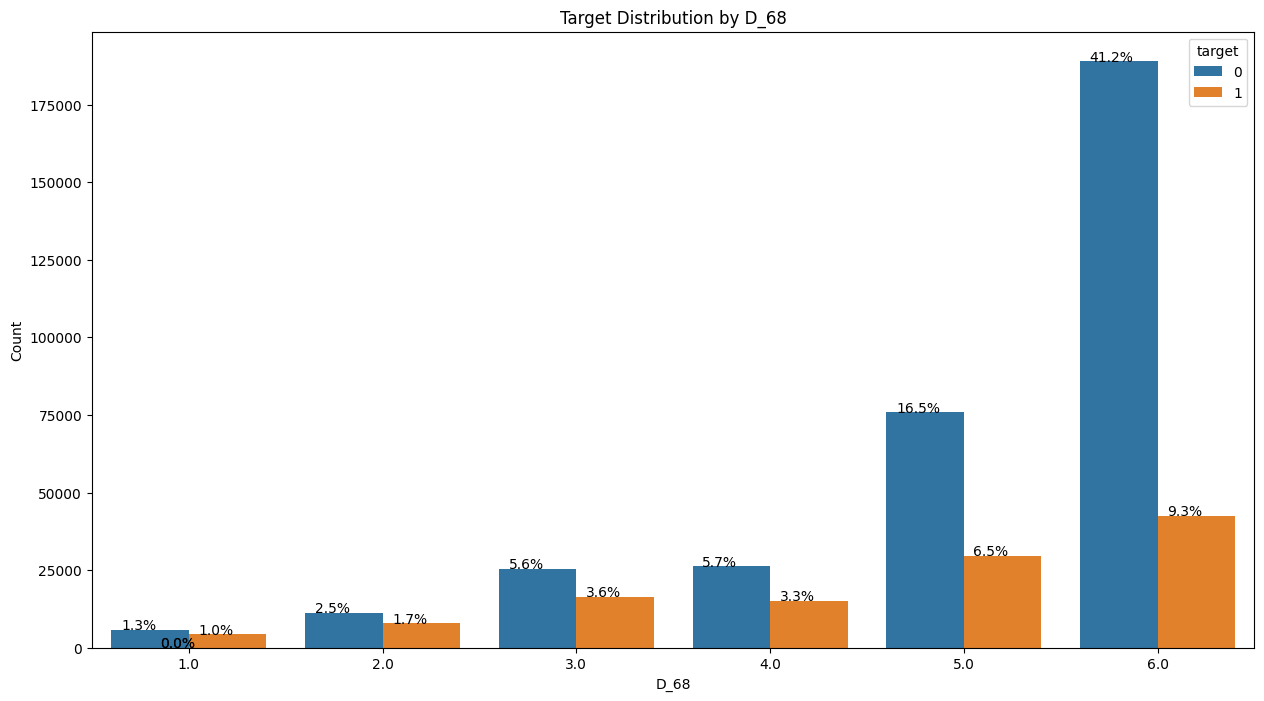

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

cat_cols = ['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63','D_64', 'D_66', 'D_68']
for col in cat_cols:
  plt.figure(figsize=(15, 8))
  sns.countplot(data=train, x=col, hue='target')
  plt.title(f'Target Distribution by {col}')
  plt.xlabel(col)
  plt.ylabel('Count')

  total = len(train)
  for p in plt.gca().patches:
      percentage = '{:.1f}%'.format(100 * p.get_height()/total)
      x = p.get_x() + p.get_width() / 2 - 0.15
      y = p.get_y() + p.get_height() + 10
      plt.gca().annotate(percentage, (x, y), fontsize=10)


  plt.show()


# D_66 has more NA's


<ipython-input-67-c361b7e6af89>:18: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=train, x=col, hue='target', common_norm=False, fill=True)


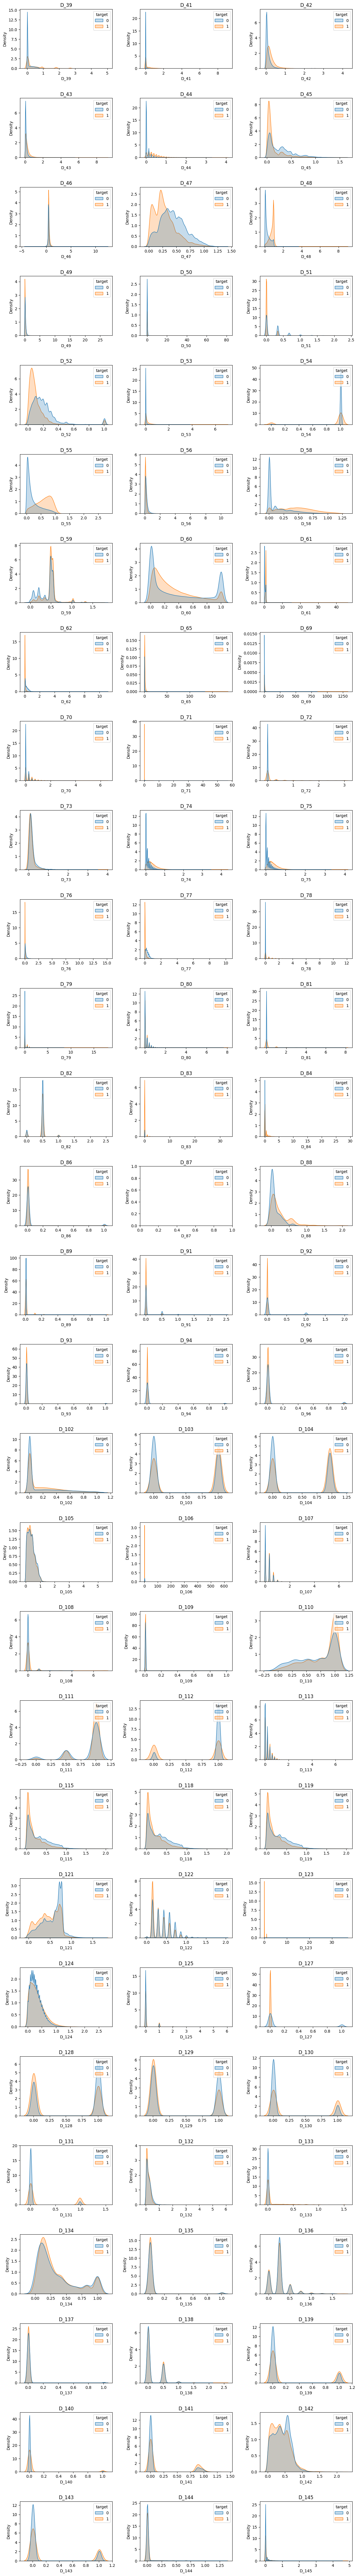

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
exclude_cols = ['D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68']

columns_to_plot = [col for col in train.columns if col.startswith('D') and col not in exclude_cols]

n_cols = 3
n_rows = -(-len(columns_to_plot) // n_cols)

plt.figure(figsize=(n_cols * 5, n_rows * 4))

for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.kdeplot(data=train, x=col, hue='target', common_norm=False, fill=True)
    plt.title(col)

plt.subplots_adjust(hspace=0.5, wspace=0.3)

plt.show()

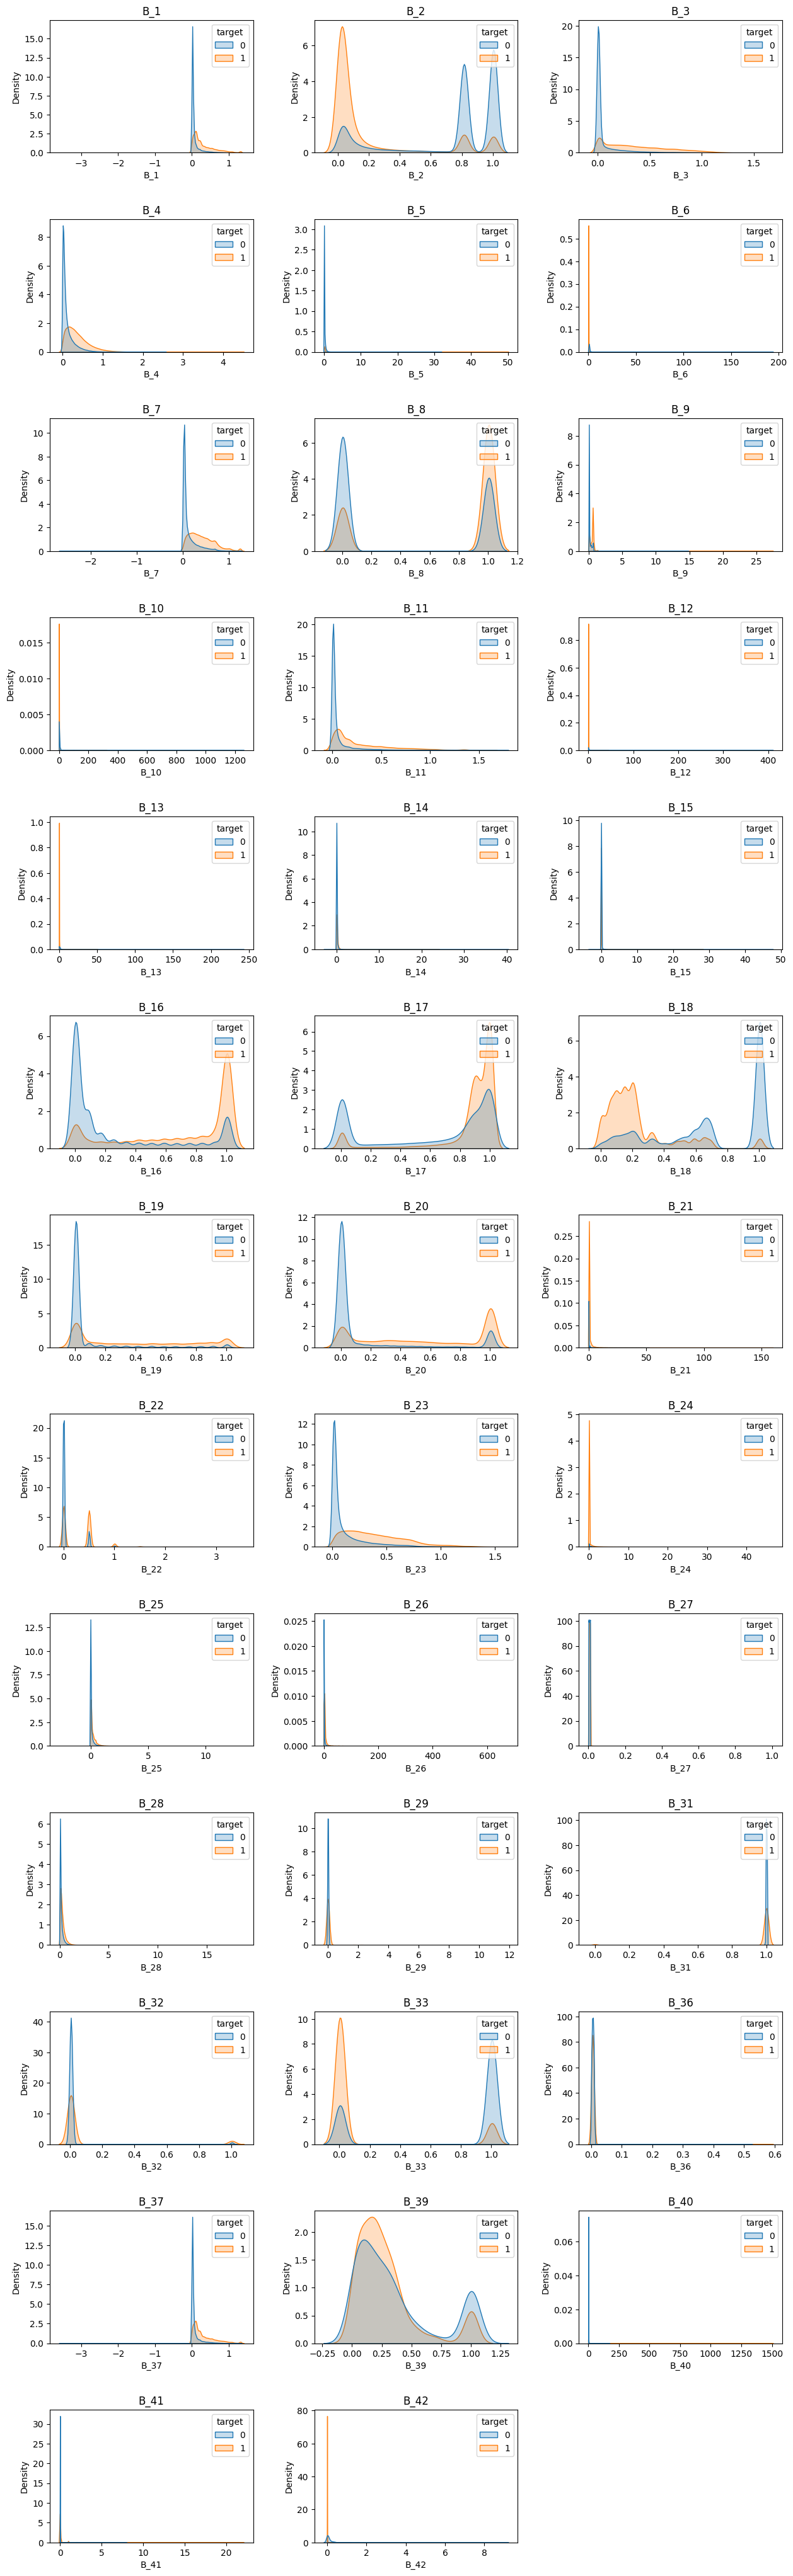

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

exclude_cols = ['B_30', 'B_38']

columns_to_plot = [col for col in train.columns if col.startswith('B') and col not in exclude_cols]

n_cols = 3
n_rows = -(-len(columns_to_plot) // n_cols)

plt.figure(figsize=(n_cols * 5, n_rows * 4))

for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.kdeplot(data=train, x=col, hue='target', common_norm=False, fill=True)
    plt.title(col)

plt.subplots_adjust(hspace=0.5, wspace=0.3)

plt.show()


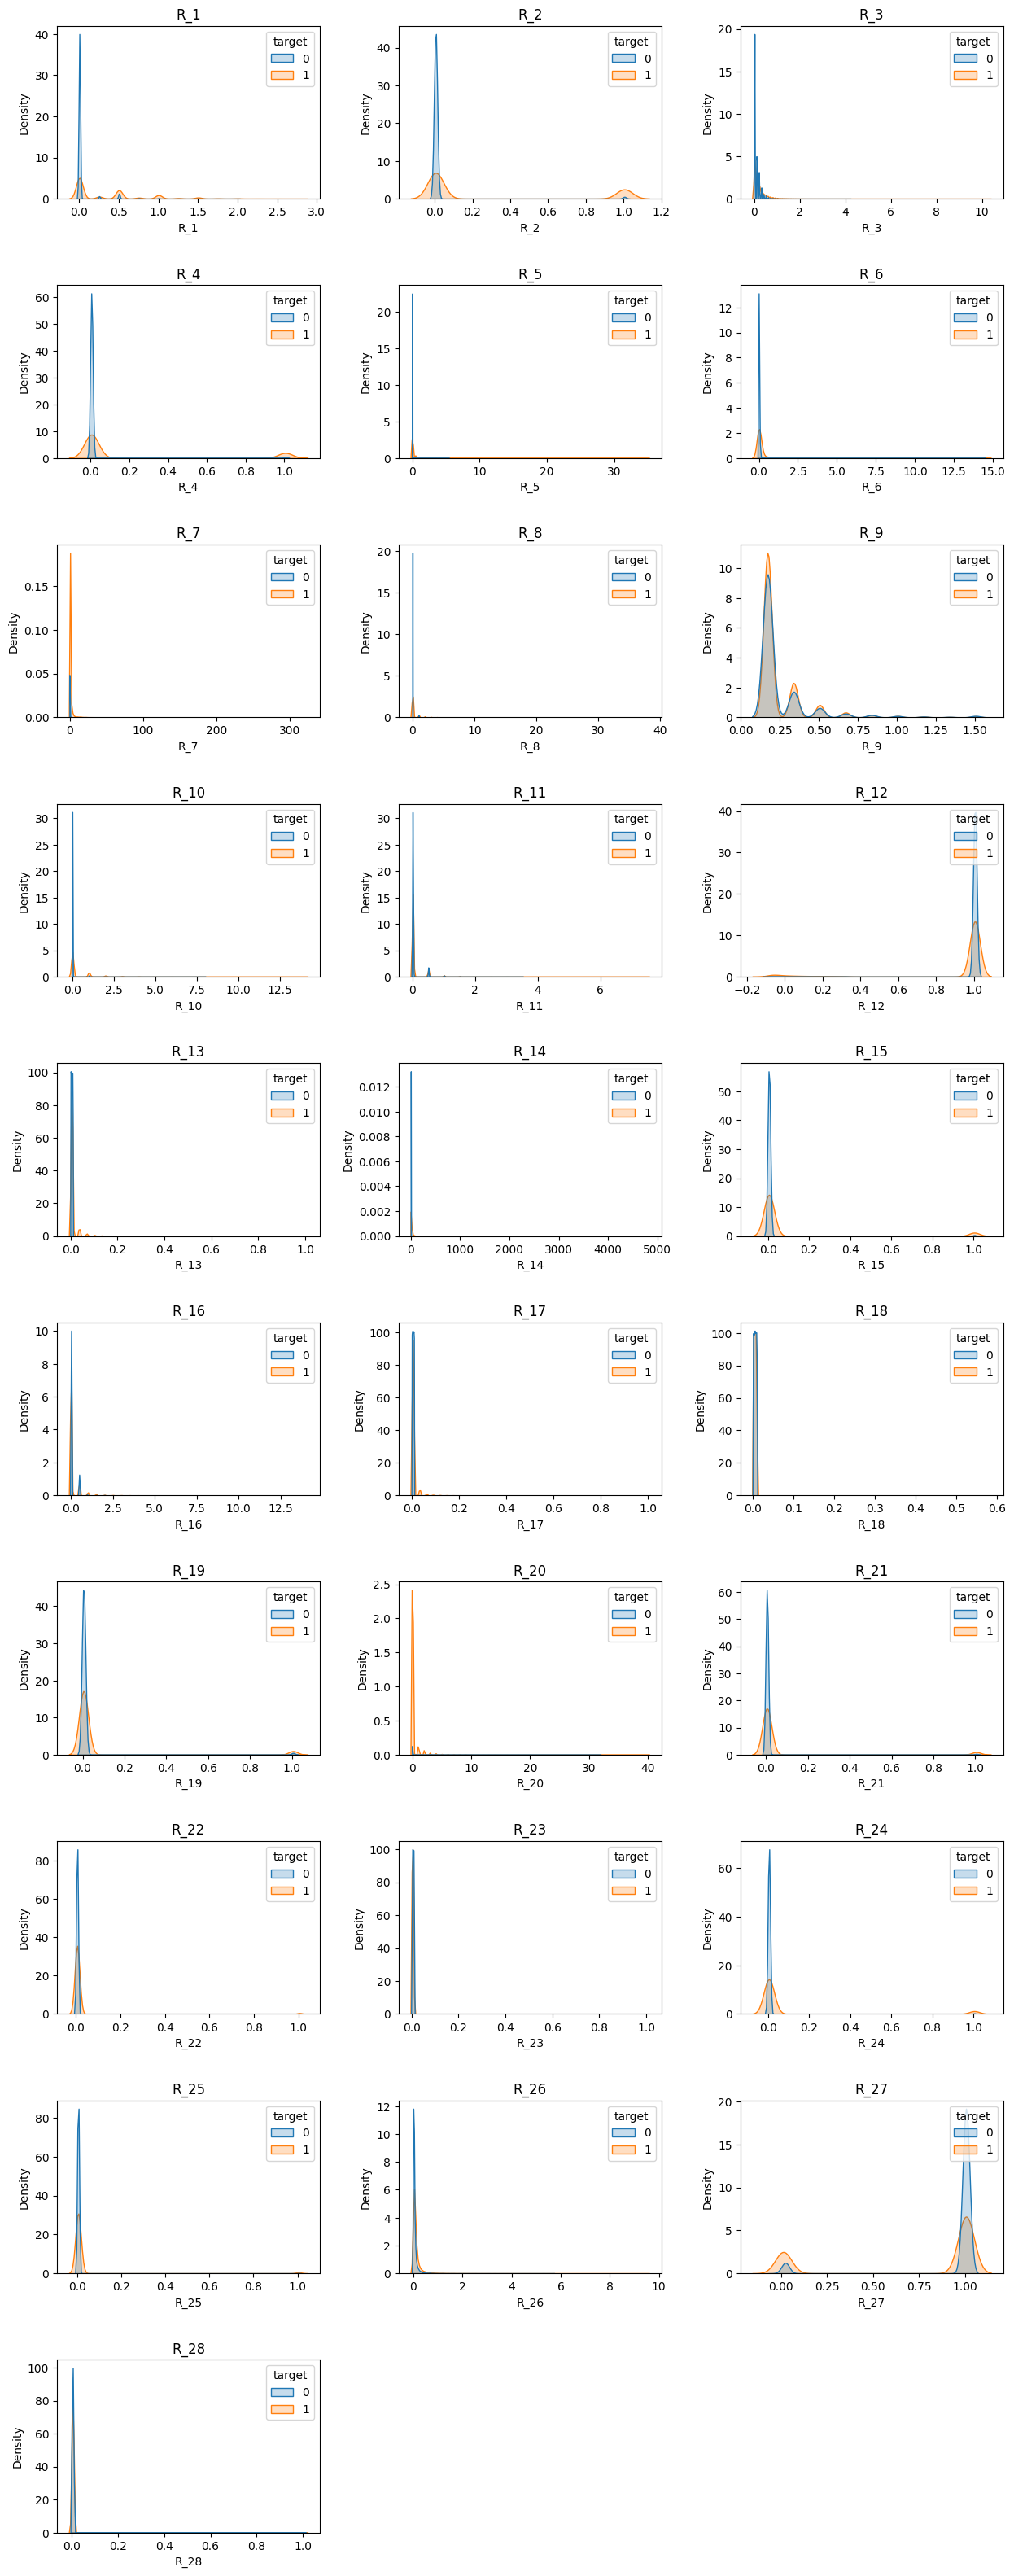

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

exclude_cols = ['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68']

columns_to_plot = [col for col in train.columns if col.startswith('R') and col not in exclude_cols]

n_cols = 3
n_rows = -(-len(columns_to_plot) // n_cols)

plt.figure(figsize=(n_cols * 5, n_rows * 4))

for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.kdeplot(data=train, x=col, hue='target', common_norm=False, fill=True)
    plt.title(col)

plt.subplots_adjust(hspace=0.5, wspace=0.3)

plt.show()


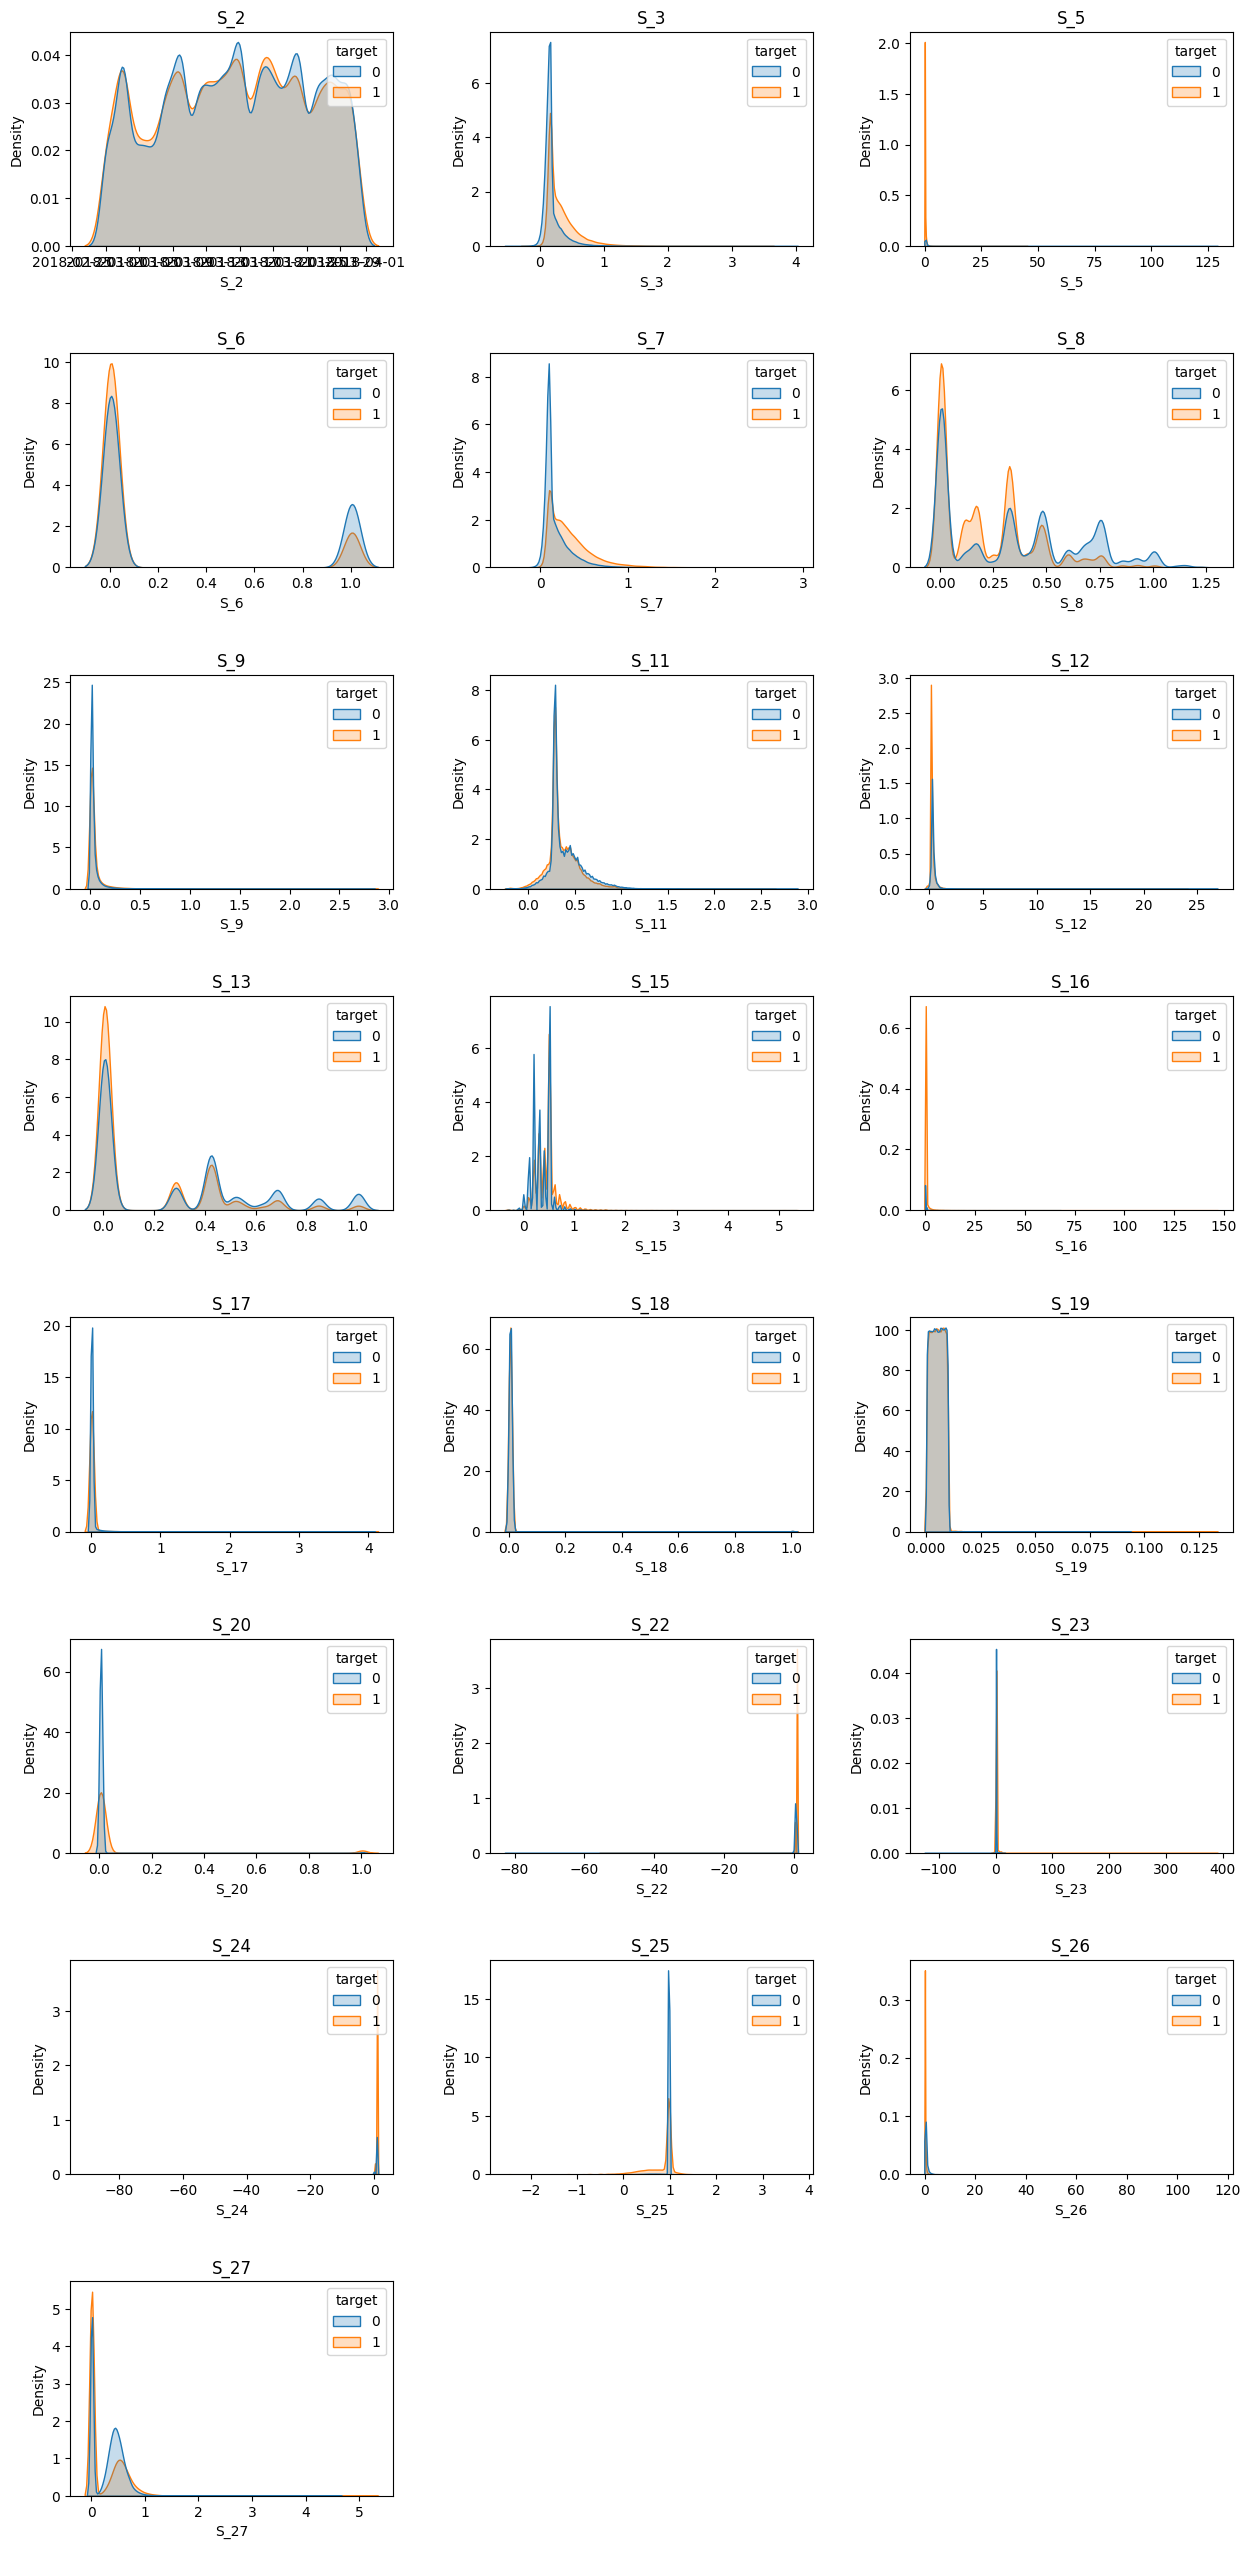

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

exclude_cols = ['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68']

columns_to_plot = [col for col in train.columns if col.startswith('S') and col not in exclude_cols]

n_cols = 3
n_rows = -(-len(columns_to_plot) // n_cols)

plt.figure(figsize=(n_cols * 5, n_rows * 4))

for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.kdeplot(data=train, x=col, hue='target', common_norm=False, fill=True)
    plt.title(col)

plt.subplots_adjust(hspace=0.5, wspace=0.3)

plt.show()


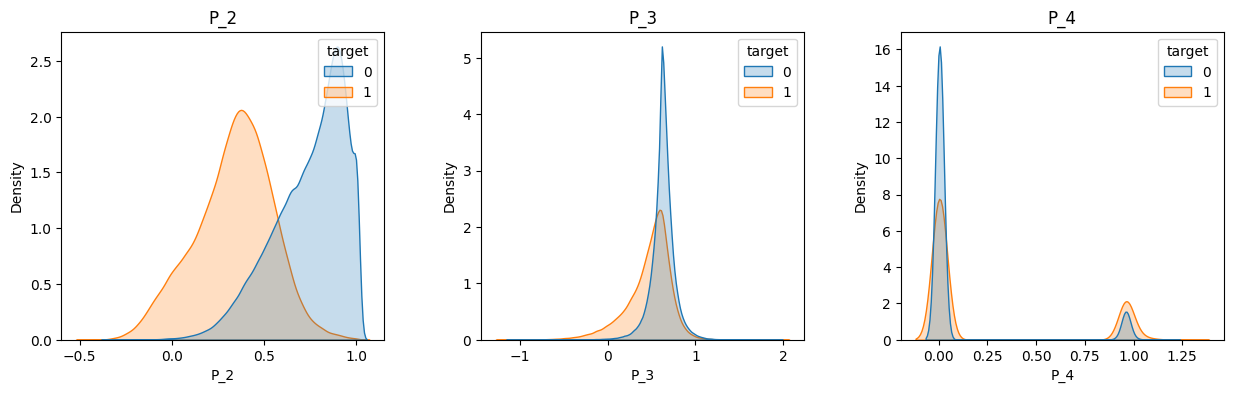

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

exclude_cols = ['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68']

columns_to_plot = [col for col in train.columns if col.startswith('P') and col not in exclude_cols]

n_cols = 3
n_rows = -(-len(columns_to_plot) // n_cols)

plt.figure(figsize=(n_cols * 5, n_rows * 4))

for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.kdeplot(data=train, x=col, hue='target', common_norm=False, fill=True)
    plt.title(col)

plt.subplots_adjust(hspace=0.5, wspace=0.3)

plt.show()


# Identifying highly multicollinear features

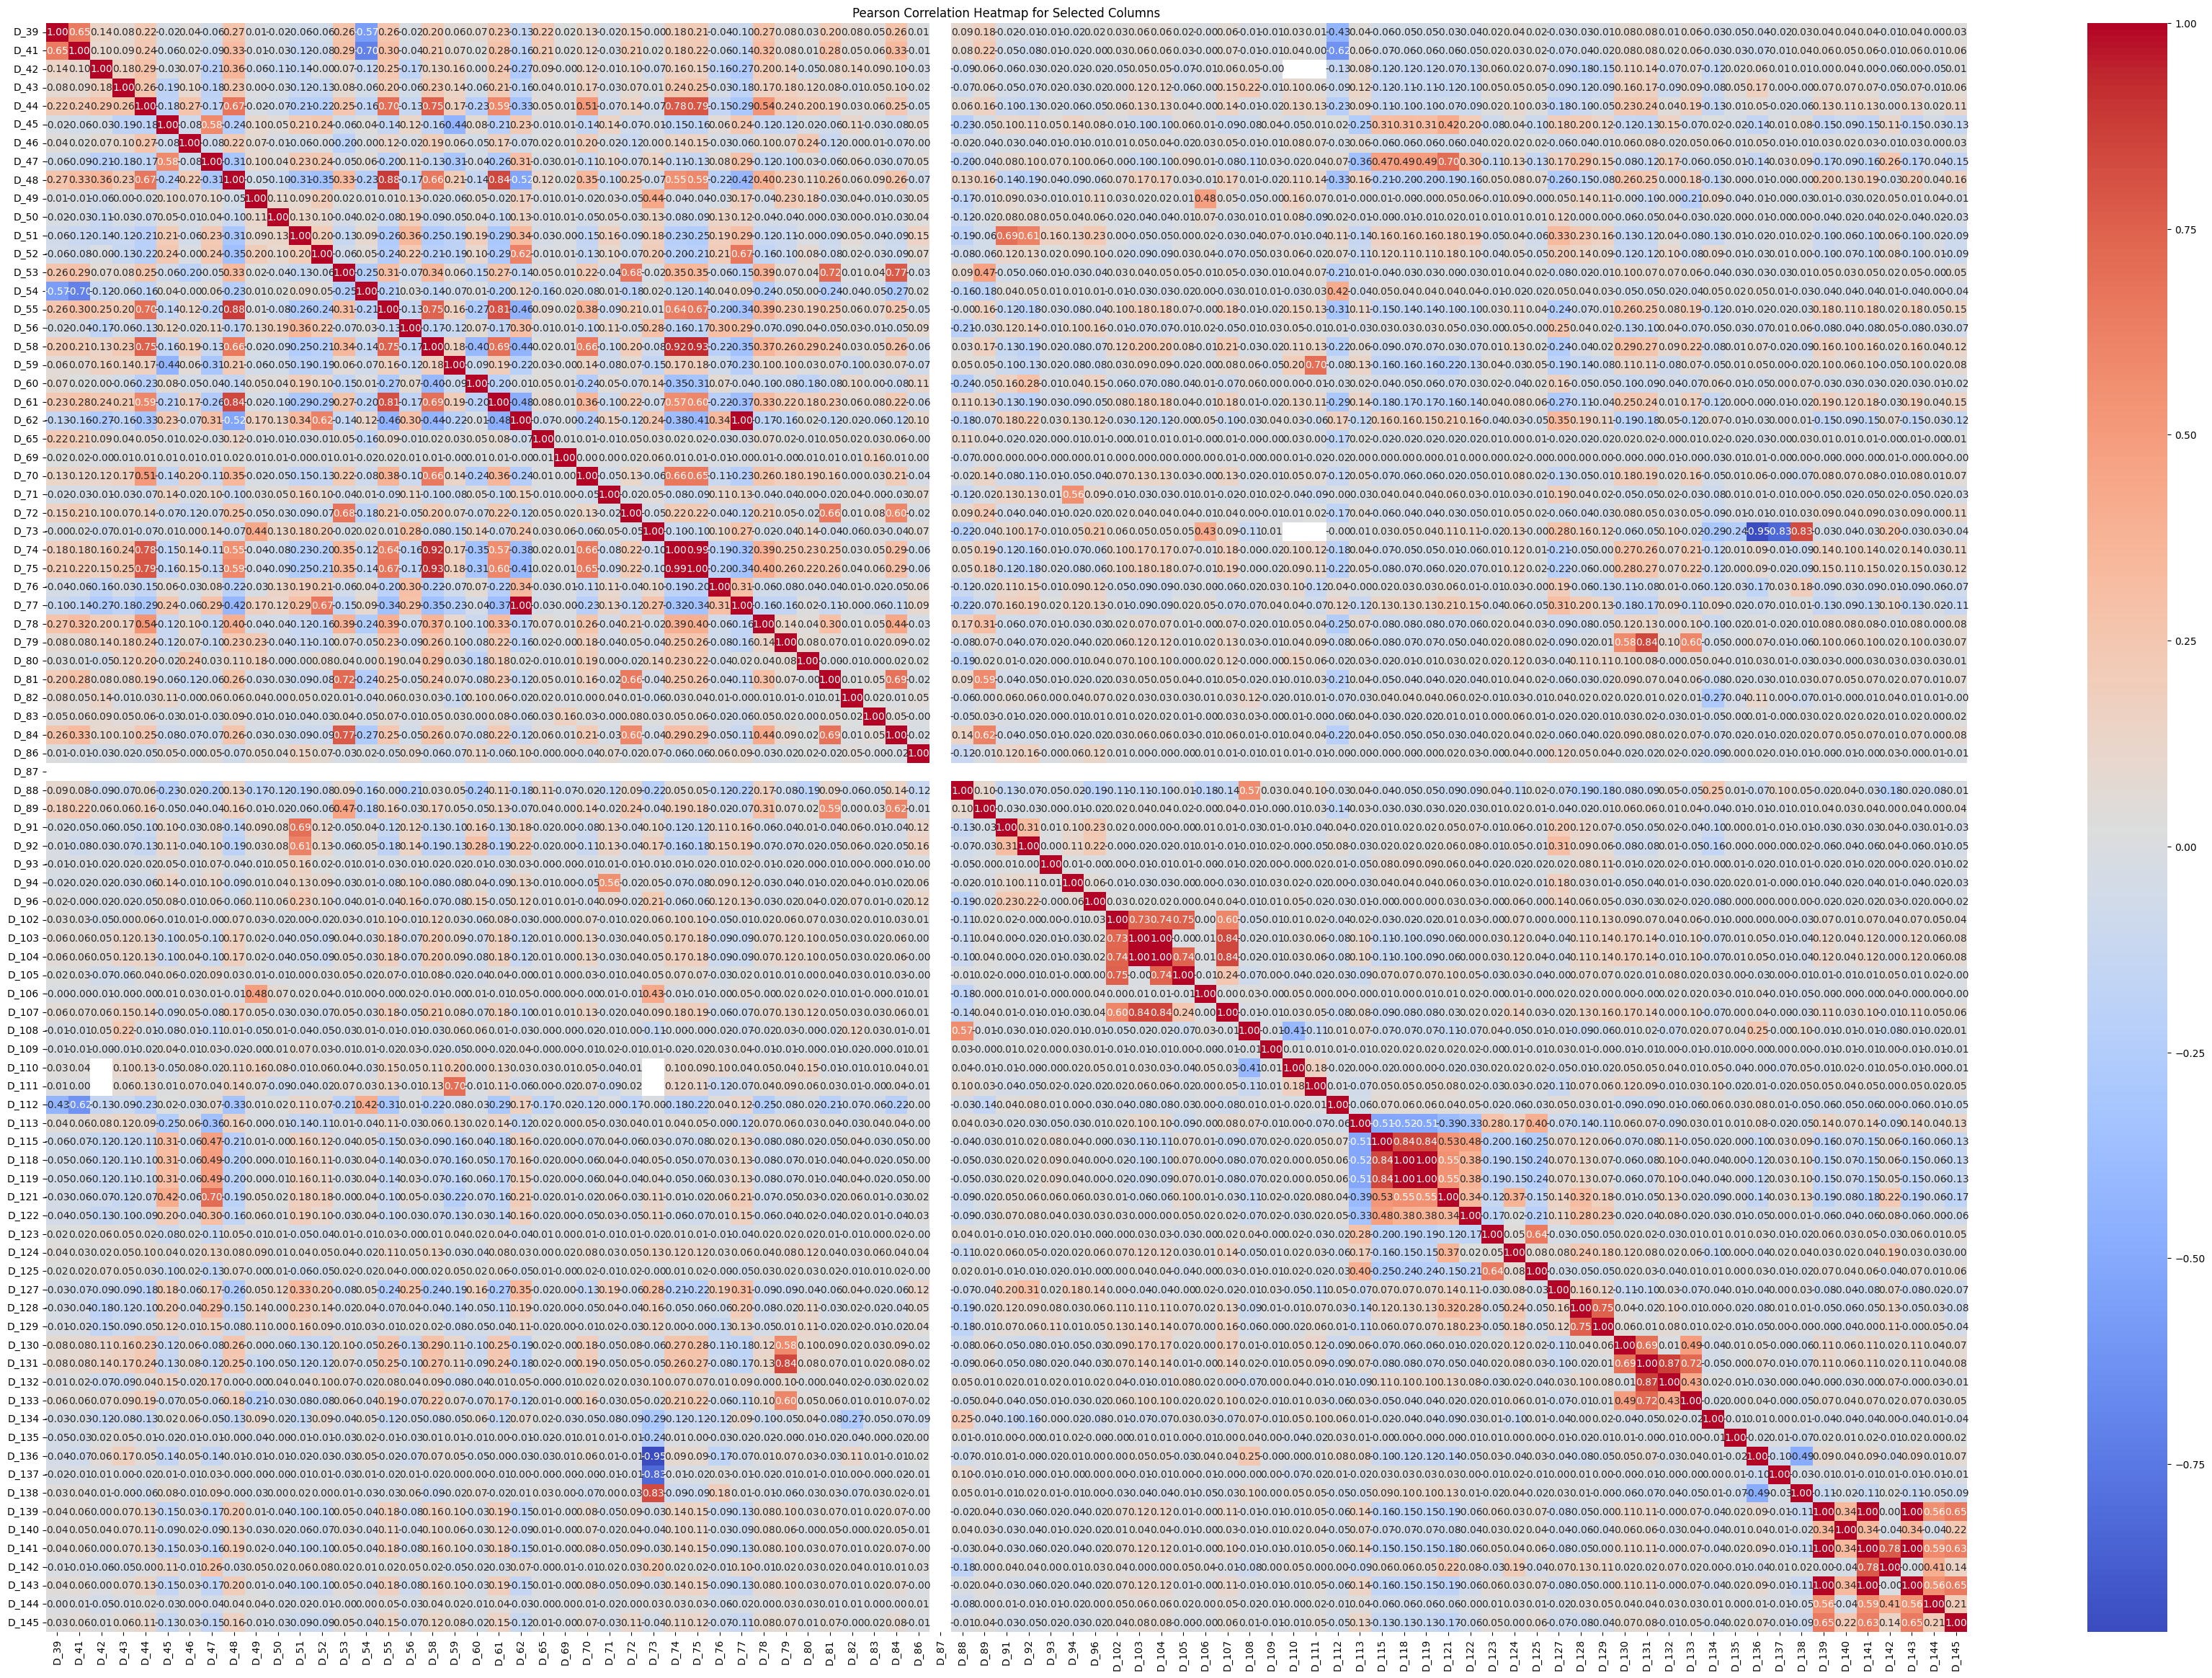

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

exclude_cols = ['D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68', 'target']

columns_to_include = [col for col in train.columns if col.startswith('D') and col not in exclude_cols]

correlation_matrix = train[columns_to_include].corr(method='pearson')

num_vars = len(columns_to_include)
fig_width = max(10, num_vars // 2)
fig_height = max(8, num_vars // 3)

plt.figure(figsize=(fig_width, fig_height))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Pearson Correlation Heatmap for Selected Columns")
plt.show()


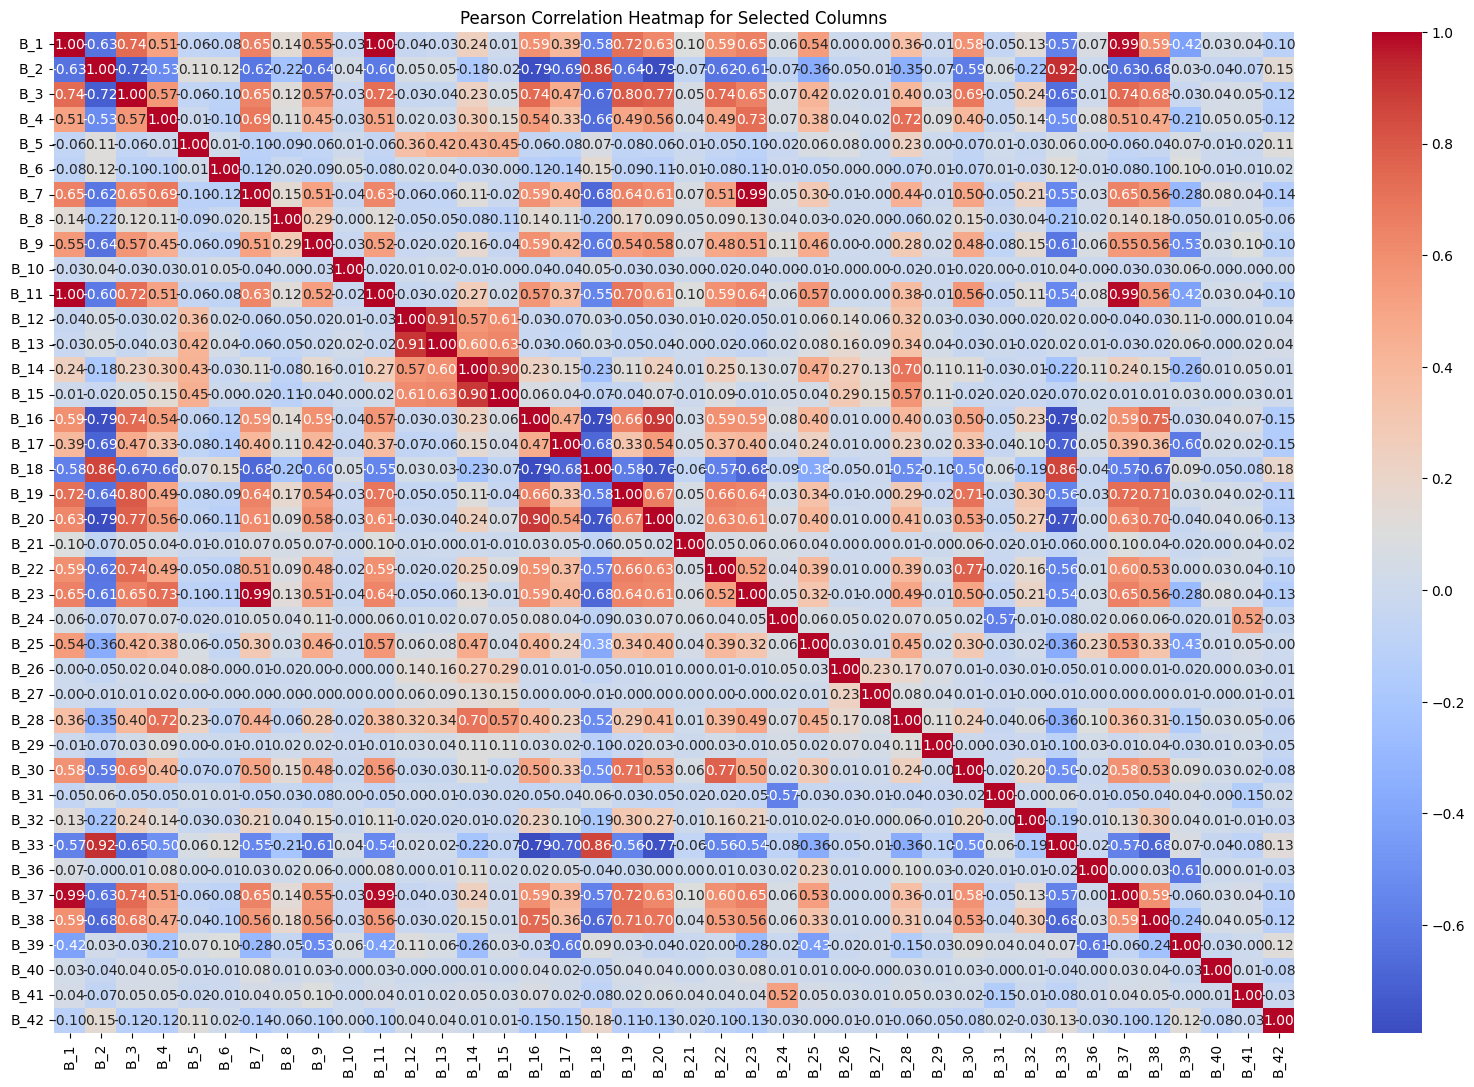

In [ ]:
exclude_cols = ['D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68', 'target']

columns_to_include = [col for col in train.columns if col.startswith('B') and col not in exclude_cols]

correlation_matrix = train[columns_to_include].corr(method='pearson')

num_vars = len(columns_to_include)
fig_width = max(10, num_vars // 2)
fig_height = max(8, num_vars // 3)

plt.figure(figsize=(fig_width, fig_height))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Pearson Correlation Heatmap for Selected Columns")
plt.show()

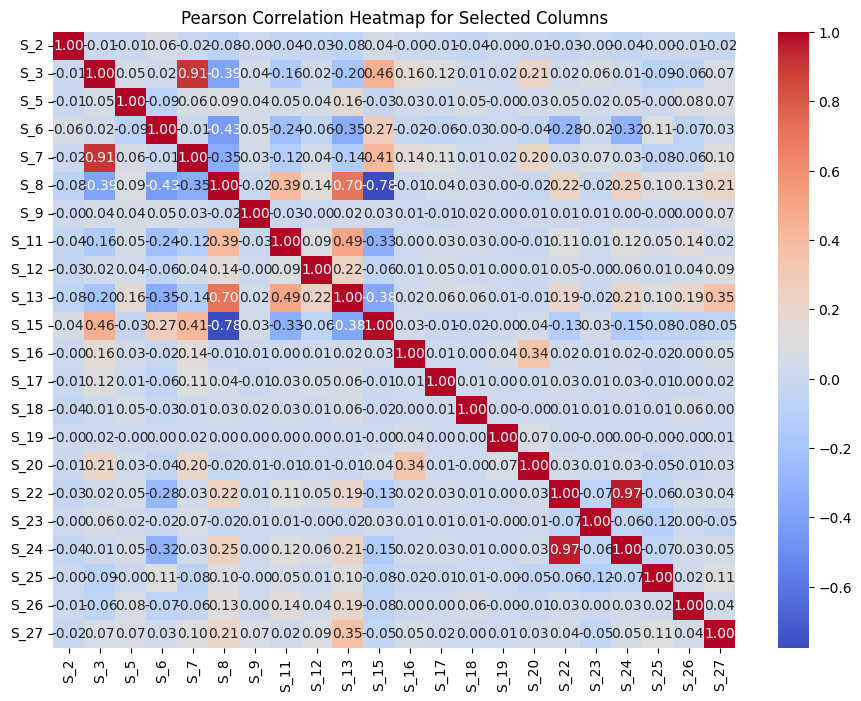

In [ ]:
exclude_cols = ['D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68', 'target']

columns_to_include = [col for col in train.columns if col.startswith('S') and col not in exclude_cols]

correlation_matrix = train[columns_to_include].corr(method='pearson')

num_vars = len(columns_to_include)
fig_width = max(10, num_vars // 2)
fig_height = max(8, num_vars // 3)

plt.figure(figsize=(fig_width, fig_height))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Pearson Correlation Heatmap for Selected Columns")
plt.show()

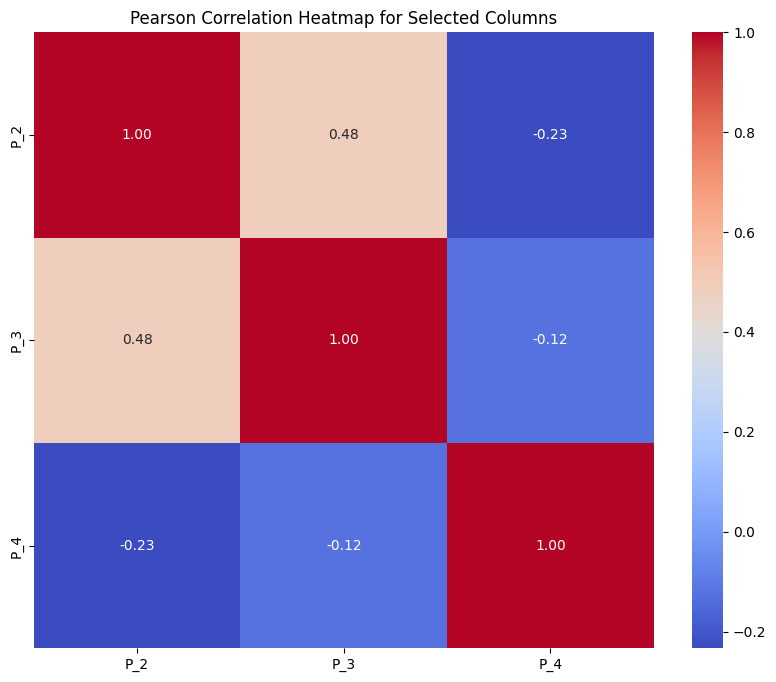

In [ ]:
exclude_cols = ['D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68', 'target']

columns_to_include = [col for col in train.columns if col.startswith('P') and col not in exclude_cols]

correlation_matrix = train[columns_to_include].corr(method='pearson')

num_vars = len(columns_to_include)
fig_width = max(10, num_vars // 2)
fig_height = max(8, num_vars // 3)

plt.figure(figsize=(fig_width, fig_height))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Pearson Correlation Heatmap for Selected Columns")
plt.show()

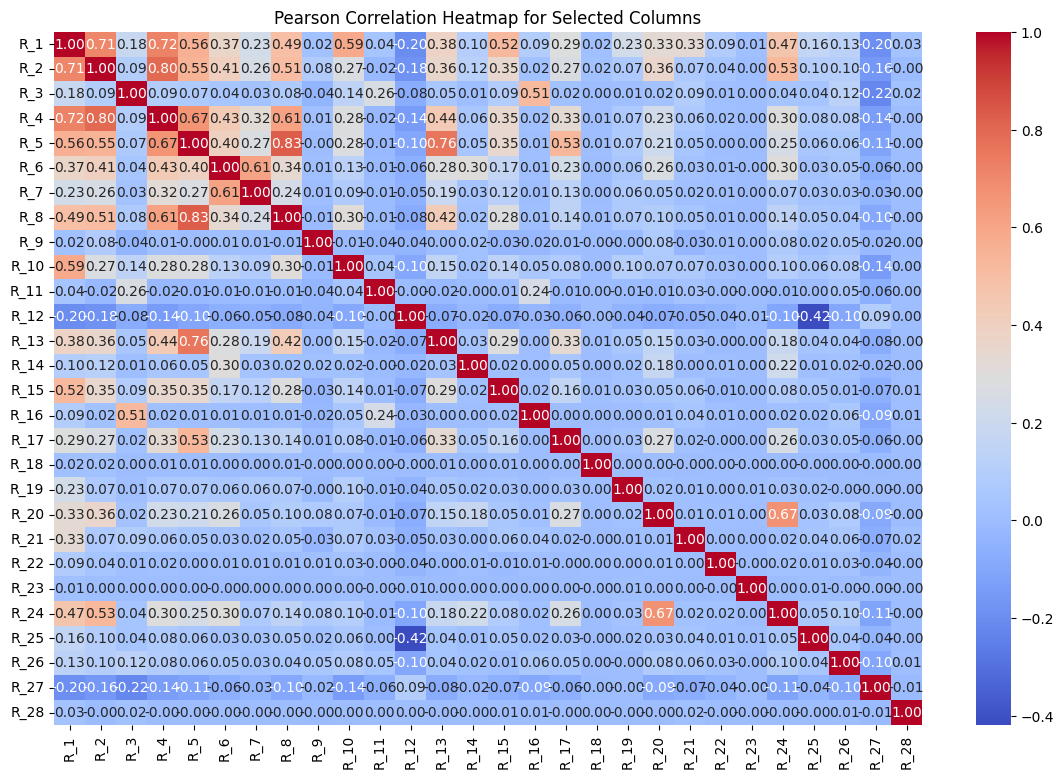

In [ ]:
exclude_cols = ['D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68', 'target']

columns_to_include = [col for col in train.columns if col.startswith('R') and col not in exclude_cols]

correlation_matrix = train[columns_to_include].corr(method='pearson')

num_vars = len(columns_to_include)
fig_width = max(10, num_vars // 2)
fig_height = max(8, num_vars // 3)

plt.figure(figsize=(fig_width, fig_height))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Pearson Correlation Heatmap for Selected Columns")
plt.show()

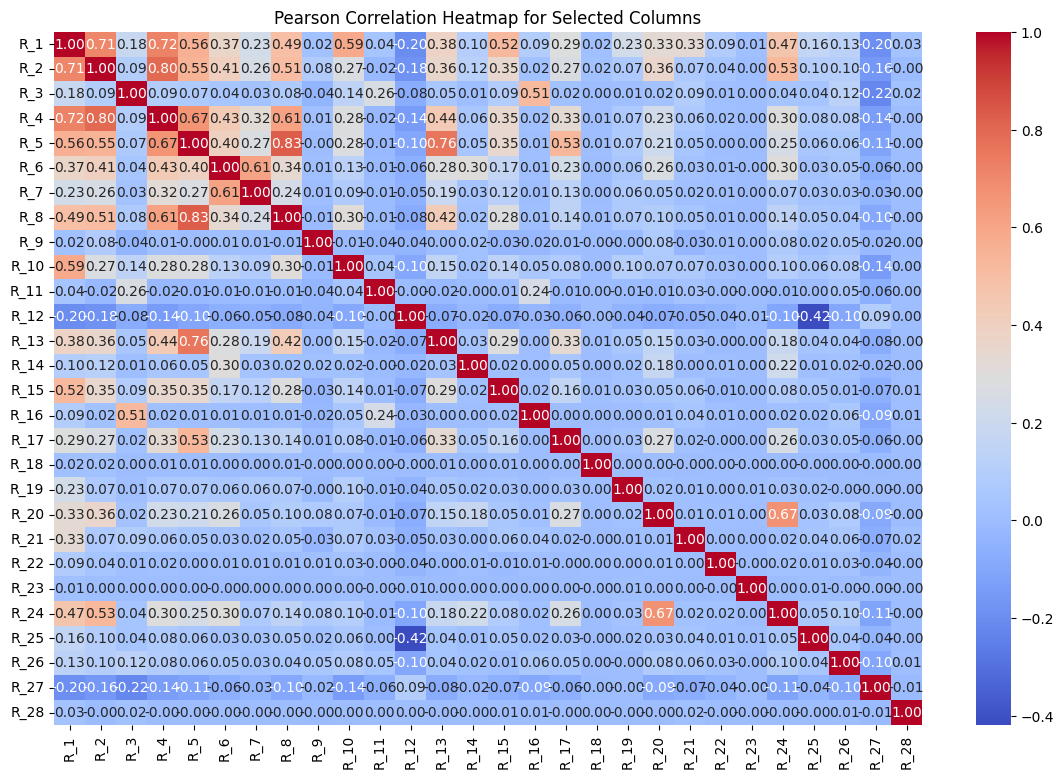

In [ ]:
exclude_cols = ['D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68']

columns_to_include = [col for col in train.columns if col.startswith('R') and col not in exclude_cols]

correlation_matrix = train[columns_to_include].corr(method='pearson')

num_vars = len(columns_to_include)
fig_width = max(10, num_vars // 2)
fig_height = max(8, num_vars // 3)

plt.figure(figsize=(fig_width, fig_height))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Pearson Correlation Heatmap for Selected Columns")
plt.show()

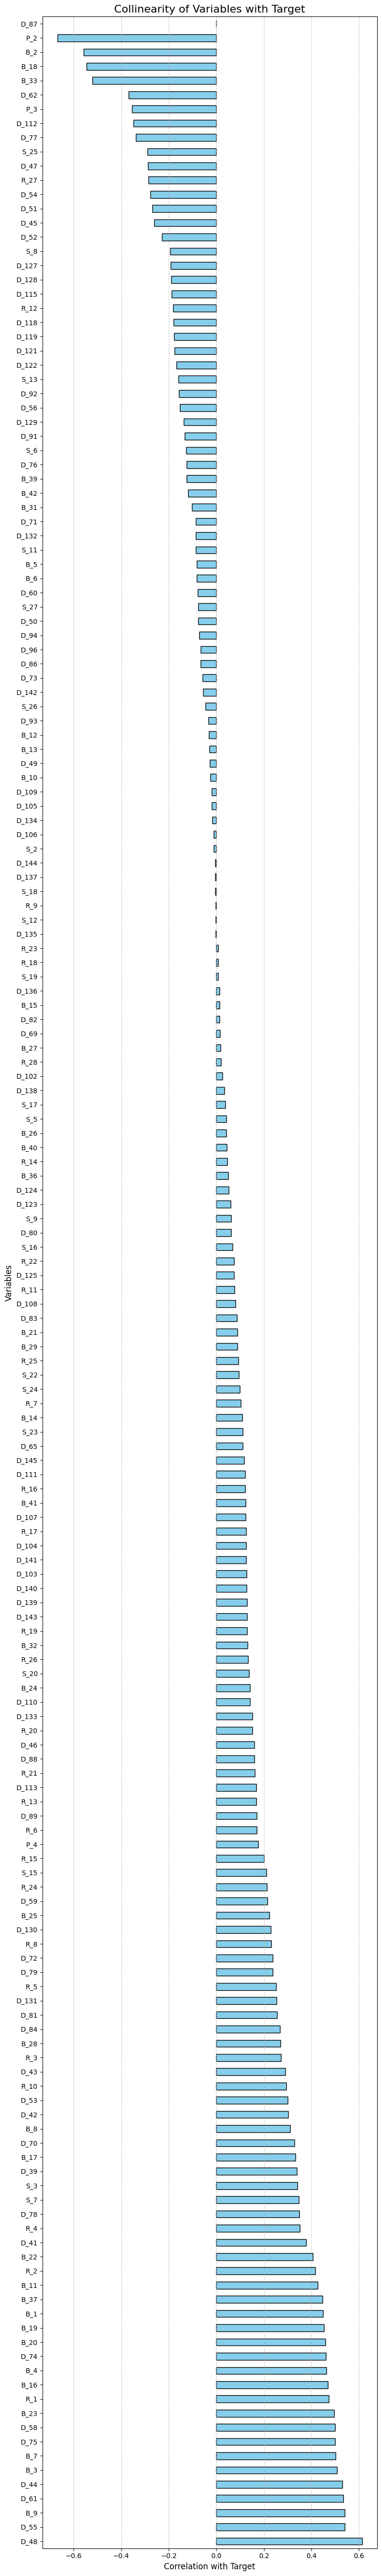

In [ ]:
exclude_cols = ['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68', 'target']

columns_to_include = [col for col in train.columns if col not in exclude_cols]

correlations_with_target = train[columns_to_include + ['target']].corr()['target'].drop('target')

sorted_correlations = correlations_with_target.sort_values(ascending=False)

plt.figure(figsize=(8, len(sorted_correlations) * 0.3))
sorted_correlations.plot(kind='barh', color='skyblue', edgecolor='black')
plt.title("Collinearity of Variables with Target", fontsize=16)
plt.xlabel("Correlation with Target", fontsize=12)
plt.ylabel("Variables", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
